In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Загружаем датасет

In [2]:
works = pd.read_excel('Dataset/ekoniva.xlsx', '2 Информация о работах', header=2)
works[['area', 'proc_depth', 'prod_weight', 'prod_dry_perc', 'prod_humid', 'prod_impur', 'yield_fact']] = works[['area', 'proc_depth', 'prod_weight', 'prod_dry_perc', 'prod_humid', 'prod_impur', 'yield_fact']].astype(float)
works.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,2022-04-29,2022-04-30,49.78,"Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,2022-05-01,2022-05-02,154.76,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,2022-05-02,2022-05-03,40.62,"Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,2022-05-02,2022-05-03,86.00,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,2022-05-02,2022-05-03,76.00,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


Оставляем только Прямое комбайнирование и Подбор обмолот

In [3]:
df = works
df = df[df['work_subtype'].isin(['Подбор и обмолот', 'Прямое комбайнирование'])]

Найдём все значения выбросов методом интерквартильного размаха (по верхней границе). Предположим, что эти данные указаны в неправильной размерности (вместо т/га - кг/га). Переводим размерность обратно.

In [4]:
Q1 = df['yield_fact'].quantile(0.25)
Q3 = df['yield_fact'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + IQR * 1.5

upper_bound

np.float64(6.7865)

In [5]:
df.loc[df['yield_fact'] >= upper_bound, 'yield_fact'] /= 1000
df.loc[df['yield_fact'] >= upper_bound, 'yield_fact'] /= 1000

df = df[['season', 'field', 'yield_fact', 'area']]
df['absolut'] = df['yield_fact'] * df['area']

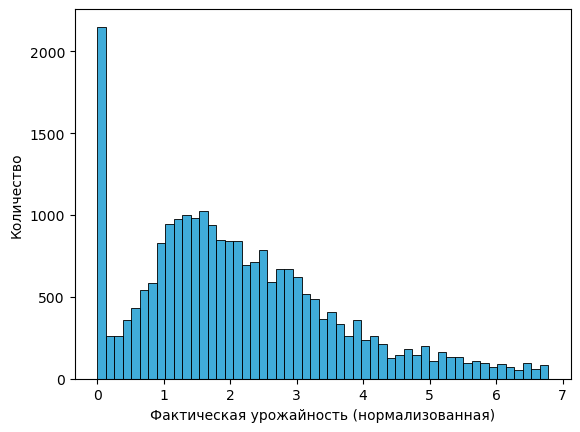

In [6]:
ar = sns.histplot(df, x='yield_fact', color="#0090CD")
ar.set_xlabel("Фактическая урожайность (нормализованная)")
ar.set_ylabel("Количество")
None

График до и после нормализации

In [7]:
ah2 = works
ah2['absolut'] = ah2['yield_fact'] * ah2['area']
ah2 = ah2[ah2['work_subtype'].isin(['Подбор и обмолот', 'Прямое комбайнирование'])]
ah2.describe()

,season,start_date,end_date,area,proc_depth,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,absolut
count,24162.000000,24162,23313,24162.000000,0.0,2.416200e+04,23420.000000,23420.000000,1.0,23548.000000,23548.000000,24162.000000,2.416200e+04
mean,2023.477154,2024-02-24 16:06:51.224236288,2024-02-27 17:28:34.528374528,18.127367,NaN,3.635466e+03,0.108284,105.588436,34.0,15.457040,4.348107,102.544983,3.635487e+03
min,2023.000000,2023-07-04 00:00:00,2023-07-04 00:00:00,0.009900,NaN,0.000000e+00,0.000000,0.000000,34.0,0.000000,0.000000,0.000000,0.000000e+00
25%,2023.000000,2023-08-27 00:00:00,2023-08-28 00:00:00,5.320000,NaN,9.520000e+00,0.000000,1.238304,34.0,12.000000,2.000000,1.309000,9.525600e+00
50%,2023.000000,2023-12-14 00:00:00,2024-01-10 00:00:00,11.120000,NaN,2.284100e+01,0.000000,2.133968,34.0,14.000000,3.000000,2.177000,2.282753e+01
75%,2024.000000,2024-08-23 00:00:00,2024-08-24 00:00:00,20.407500,NaN,5.066600e+01,0.000000,3.487958,34.0,16.500000,5.000000,3.500000,5.067597e+01
max,2024.000000,2024-10-27 00:00:00,2024-10-27 00:00:00,565.410000,NaN,6.797438e+06,1.000000,415745.412844,34.0,14172.000000,230.000000,415745.400000,6.797437e+06
std,0.499488,NaN,NaN,27.205798,NaN,5.638758e+04,0.310745,2774.124394,NaN,93.592502,5.867239,2731.259492,5.638757e+04


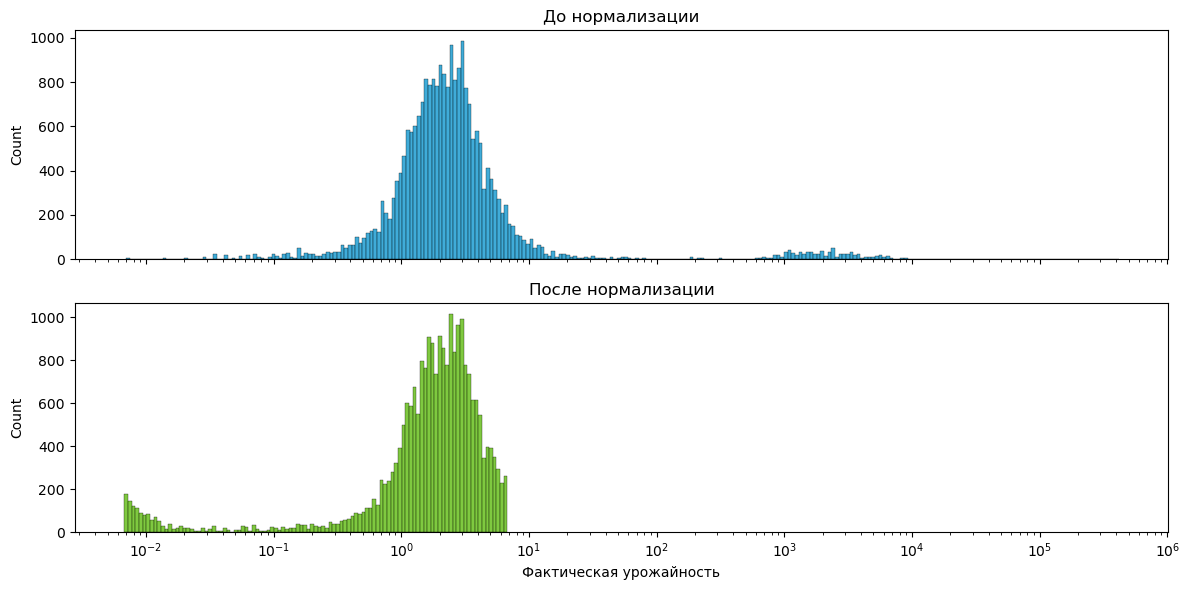

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Первый boxplot
sns.histplot(
    x=ah2['yield_fact'],
    ax=axes[0],
    color="#0090CD",
    log_scale=True
)
axes[0].set_title("До нормализации")
axes[0].set_xlabel("Фактическая урожайность")

# Второй boxplot
sns.histplot(
    x=df['yield_fact'],
    ax=axes[1],
    color="#54B800",
    log_scale=True
)
axes[1].set_title("После нормализации")
axes[1].set_xlabel("Фактическая урожайность")

# Устанавливаем общий стиль
plt.tight_layout()

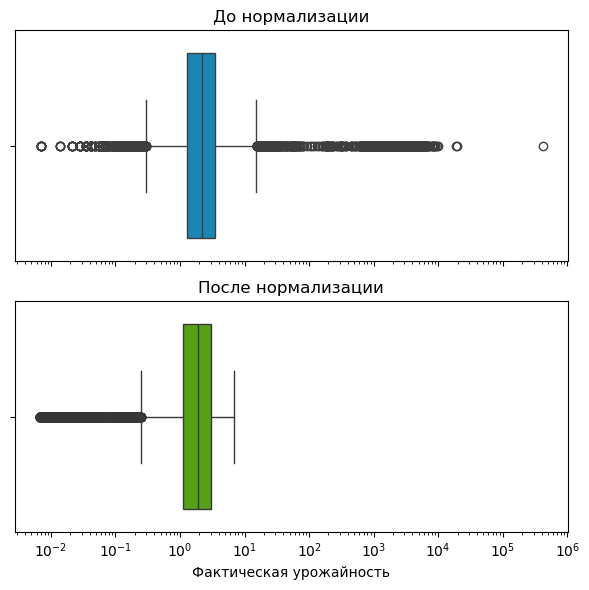

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# Первый boxplot
sns.boxplot(
    x=ah2['yield_fact'],
    orient='h',
    ax=axes[0],
    color="#0090CD",
    log_scale=True
)
axes[0].set_title("До нормализации")
axes[0].set_xlabel("Фактическая урожайность")

# Второй boxplot
sns.boxplot(
    x=df['yield_fact'],
    orient='h',
    ax=axes[1],
    color="#54B800",
    log_scale=True
)
axes[1].set_title("После нормализации")
axes[1].set_xlabel("Фактическая урожайность")

# Устанавливаем общий стиль
plt.tight_layout()

Сохранение полученного датасета

In [10]:
df.to_csv('Dataset/works.csv', index=False)